<a href="https://colab.research.google.com/github/bettyramohubu/rai-content-safety-workshop/blob/main/Betty_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Preprocessing:

In [ ]:
import pandas as pd
confirmed_cases = pd.read_csv('/content/time_series_covid19_confirmed_US.csv')
deaths = pd.read_csv('/content/time_series_covid19_deaths_US.csv')

In [ ]:
confirmed_cases.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [ ]:
confirmed_cases.describe()

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
count,3.342000e+03,3342.000000,3332.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,...,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03
mean,8.342992e+07,834.494913,33043.078932,36.721617,-88.642045,0.000299,0.000299,0.000598,0.000598,0.001496,...,3.095256e+04,3.097961e+04,3.099634e+04,3.101397e+04,3.101461e+04,3.101346e+04,3.101602e+04,3.102660e+04,3.104601e+04,3.106005e+04
std,4.314076e+06,36.487378,18648.808931,9.079322,21.776287,0.017298,0.017298,0.024459,0.024459,0.038656,...,1.080476e+05,1.081128e+05,1.081972e+05,1.083087e+05,1.083093e+05,1.083090e+05,1.083152e+05,1.083322e+05,1.083601e+05,1.084494e+05
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.401811e+07,840.000000,19076.500000,33.896803,-97.803595,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.911000e+03,2.916250e+03,2.920250e+03,2.920250e+03,2.920250e+03,2.920250e+03,2.920250e+03,2.923000e+03,2.917500e+03,2.917500e+03
50%,8.402921e+07,840.000000,31012.000000,38.005610,-89.488865,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.707000e+03,7.713000e+03,7.724500e+03,7.724500e+03,7.724500e+03,7.724500e+03,7.724500e+03,7.735500e+03,7.735500e+03,7.750000e+03
75%,8.404612e+07,840.000000,47129.500000,41.579255,-82.313398,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.025800e+04,2.030300e+04,2.030375e+04,2.031275e+04,2.031275e+04,2.031275e+04,2.031950e+04,2.033450e+04,2.034500e+04,2.034875e+04
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.697797e+06,3.697797e+06,3.704034e+06,3.705381e+06,3.705381e+06,3.705381e+06,3.705381e+06,3.705381e+06,3.705381e+06,3.710586e+06


In [ ]:
deaths.describe()

,UID,code3,FIPS,Lat,Long_,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
count,3.342000e+03,3342.000000,3332.000000,3342.000000,3342.000000,3.342000e+03,3342.000000,3342.000000,3342.000000,3342.000000,...,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000
mean,8.342992e+07,834.494913,33043.078932,36.721617,-88.642045,9.960357e+04,0.000299,0.000299,0.000299,0.000299,...,335.103830,335.397068,335.624776,335.776481,335.778576,335.767205,335.781269,335.881508,336.099940,336.276481
std,4.314076e+06,36.487378,18648.808931,9.079322,21.776287,3.241661e+05,0.017298,0.017298,0.017298,0.017298,...,1103.909631,1104.435933,1105.572242,1105.748480,1105.751727,1105.746239,1105.772895,1105.924446,1106.230834,1107.369648
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.401811e+07,840.000000,19076.500000,33.896803,-97.803595,9.917250e+03,0.000000,0.000000,0.000000,0.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,39.000000,39.000000
50%,8.402921e+07,840.000000,31012.000000,38.005610,-89.488865,2.489150e+04,0.000000,0.000000,0.000000,0.000000,...,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
75%,8.404612e+07,840.000000,47129.500000,41.579255,-82.313398,6.497525e+04,0.000000,0.000000,0.000000,0.000000,...,245.750000,245.750000,245.750000,246.000000,246.000000,246.000000,246.000000,246.750000,246.750000,246.750000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,1.003911e+07,1.000000,1.000000,1.000000,1.000000,...,35366.000000,35366.000000,35453.000000,35453.000000,35453.000000,35453.000000,35453.000000,35453.000000,35453.000000,35545.000000


In [ ]:
# Check for missing values
print(confirmed_cases.isnull().sum())

UID       0
iso2      0
iso3      0
code3     0
FIPS      0
         ..
3/5/23    0
3/6/23    0
3/7/23    0
3/8/23    0
3/9/23    0
Length: 1154, dtype: int64


In [ ]:
# Select only numeric columns for filling missing values
numeric_columns = confirmed_cases.select_dtypes(include=['number']).columns
confirmed_cases[numeric_columns] = confirmed_cases[numeric_columns].fillna(confirmed_cases[numeric_columns].mean())
print(confirmed_cases.isnull().sum())

UID       0
iso2      0
iso3      0
code3     0
FIPS      0
         ..
3/5/23    0
3/6/23    0
3/7/23    0
3/8/23    0
3/9/23    0
Length: 1154, dtype: int64


In [ ]:
confirmed_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Columns: 1154 entries, UID to 3/9/23
dtypes: float64(3), int64(1145), object(6)
memory usage: 29.4+ MB


In [ ]:
merged = pd.merge(confirmed_cases, deaths, on='Combined_Key')

#2.Descriptive Analysis:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Drop unnecessary columns and keep the time series data
confirmed_time_series = confirmed_cases.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key']) # Removed 'Population' from the list
deaths_time_series = deaths.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population']) # Dropped 'Population' here

# Melt the data to long format
confirmed_long = confirmed_time_series.melt(id_vars=['Province_State'], var_name='Date', value_name='Confirmed')
deaths_long = deaths_time_series.melt(id_vars=['Province_State'], var_name='Date', value_name='Deaths')

# Convert 'Date' column to datetime
confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'])
deaths_long['Date'] = pd.to_datetime(deaths_long['Date'])

<ipython-input-4-3dc98e01250e>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'])
<ipython-input-4-3dc98e01250e>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths_long['Date'] = pd.to_datetime(deaths_long['Date'])


In [ ]:
# Display the reshaped data
print(confirmed_long.head())
print(deaths_long.head())

  Province_State       Date  Confirmed
0        Alabama 2020-01-22          0
1        Alabama 2020-01-22          0
2        Alabama 2020-01-22          0
3        Alabama 2020-01-22          0
4        Alabama 2020-01-22          0
  Province_State       Date  Deaths
0        Alabama 2020-01-22       0
1        Alabama 2020-01-22       0
2        Alabama 2020-01-22       0
3        Alabama 2020-01-22       0
4        Alabama 2020-01-22       0


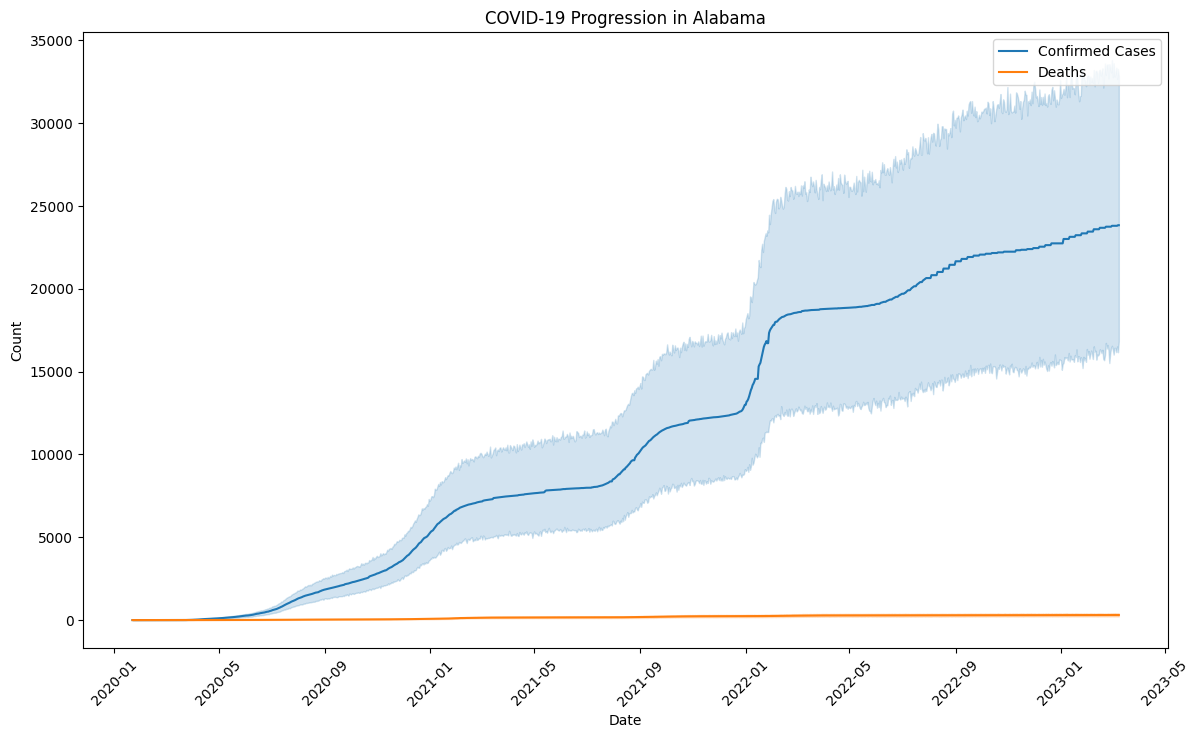

In [ ]:
# Function to plot time series for a specific state
def plot_time_series(state):
    fig, ax = plt.subplots(figsize=(14, 8))

    state_confirmed = confirmed_long[confirmed_long['Province_State'] == state]
    state_deaths = deaths_long[deaths_long['Province_State'] == state]

    sns.lineplot(x='Date', y='Confirmed', data=state_confirmed, ax=ax, label='Confirmed Cases')
    sns.lineplot(x='Date', y='Deaths', data=state_deaths, ax=ax, label='Deaths')

    ax.set_title(f'COVID-19 Progression in {state}')
    ax.set_ylabel('Count')
    ax.set_xlabel('Date')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Example: Plot for Alabama
plot_time_series('Alabama')


In [ ]:
# Calculate daily rates of change for confirmed cases
confirmed_long['Daily_Change'] = confirmed_long.groupby('Province_State')['Confirmed'].diff().fillna(0)

# Calculate daily rates of change for deaths
deaths_long['Daily_Change'] = deaths_long.groupby('Province_State')['Deaths'].diff().fillna(0)
print(confirmed_long)
print(deaths_long)

        Province_State       Date  Confirmed  Daily_Change
0              Alabama 2020-01-22          0           0.0
1              Alabama 2020-01-22          0           0.0
2              Alabama 2020-01-22          0           0.0
3              Alabama 2020-01-22          0           0.0
4              Alabama 2020-01-22          0           0.0
...                ...        ...        ...           ...
3819901        Wyoming 2023-03-09      12134        -373.0
3819902        Wyoming 2023-03-09       6406       -5728.0
3819903        Wyoming 2023-03-09          0       -6406.0
3819904        Wyoming 2023-03-09       2755        2755.0
3819905        Wyoming 2023-03-09       1905        -850.0

[3819906 rows x 4 columns]
        Province_State       Date  Deaths  Daily_Change
0              Alabama 2020-01-22       0           0.0
1              Alabama 2020-01-22       0           0.0
2              Alabama 2020-01-22       0           0.0
3              Alabama 2020-01-22       

In [ ]:
# Assuming you want to calculate weekly changes from the 'confirmed_long' DataFrame
# First, resample the data to weekly frequency
confirmed_weekly = confirmed_long.groupby('Province_State').resample('W', on='Date')['Confirmed'].sum().reset_index()

# Then, calculate the weekly changes
confirmed_weekly['weekly_Change'] = confirmed_weekly.groupby('Province_State')['Confirmed'].diff().fillna(0)

print(confirmed_weekly)

     Province_State       Date  Confirmed  weekly_Change
0           Alabama 2020-01-26          0            0.0
1           Alabama 2020-02-02          0            0.0
2           Alabama 2020-02-09          0            0.0
3           Alabama 2020-02-16          0            0.0
4           Alabama 2020-02-23          0            0.0
...             ...        ...        ...            ...
9507        Wyoming 2023-02-12    1288679         5867.0
9508        Wyoming 2023-02-19    1291281         2602.0
9509        Wyoming 2023-02-26    1293401         2120.0
9510        Wyoming 2023-03-05    1295770         2369.0
9511        Wyoming 2023-03-12     741314      -554456.0

[9512 rows x 4 columns]


#3.Time Series Analysis:

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Select time series for a column
county_data = confirmed_cases['UID']

In [ ]:
# Perform Dickey-Fuller test
result = adfuller(county_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# If p-value > 0.05, the series is non-stationary

ADF Statistic: -5.594691942751185
p-value: 1.3050933952279949e-06
Critial Values:
   1%, -3.4323158604754145
Critial Values:
   5%, -2.8624086018222883
Critial Values:
   10%, -2.5672323742255743


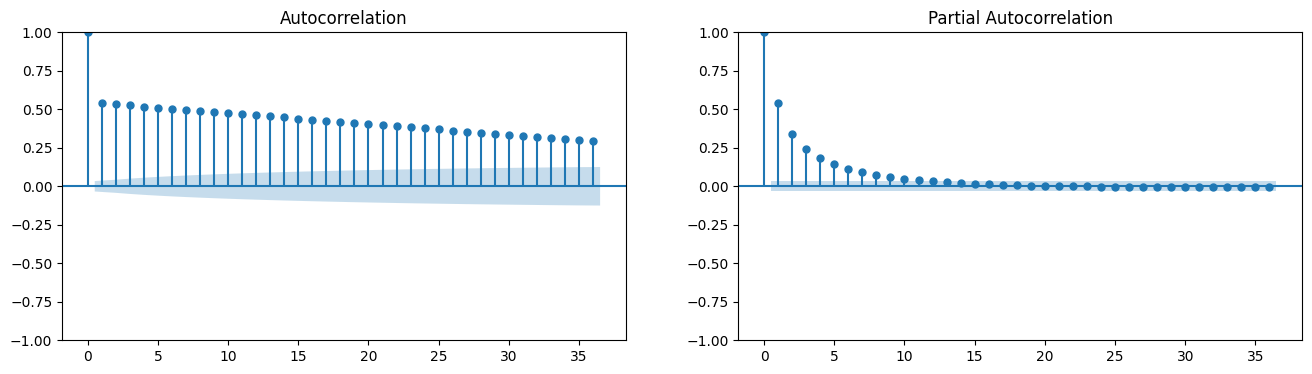

In [ ]:
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(county_data, ax=axes[0])
plot_pacf(county_data, ax=axes[1])

plt.show()

# Choose p, d, q based on plots
# p: number of lag observations included in the model (autoregressive part)
# d: number of times that the raw observations are differenced
# q: size of the moving average window
p = 1  # Example value based on PACF plot
d = 1  # Differencing applied
q = 1  # Example value based on ACF plot

In [ ]:
# Split the data into training and testing sets
train_size = int(len(county_data) * 0.8)
train, test = county_data[:train_size], county_data[train_size:]

# Train the ARIMA model
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    UID   No. Observations:                 2673
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -43874.761
Date:                Wed, 03 Jul 2024   AIC                          87755.521
Time:                        13:35:36   BIC                          87773.193
Sample:                             0   HQIC                         87761.915
                               - 2673                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0761      0.005     14.400      0.000       0.066       0.086
ma.L1         -0.8124      0.005   -159.453      0.000      -0.822      -0.802
sigma2      1.052e+13   1.67e-16   6.31e+28      0.0

In [ ]:
# Forecast
forecast = model_fit.forecast(steps=len(test))
forecast_conf_int = model_fit.get_forecast(steps=len(test)).conf_int()

# Calculate MAPE
mape = mean_absolute_percentage_error(test, forecast)
print('MAPE:', mape)

MAPE: 147.80541622800635


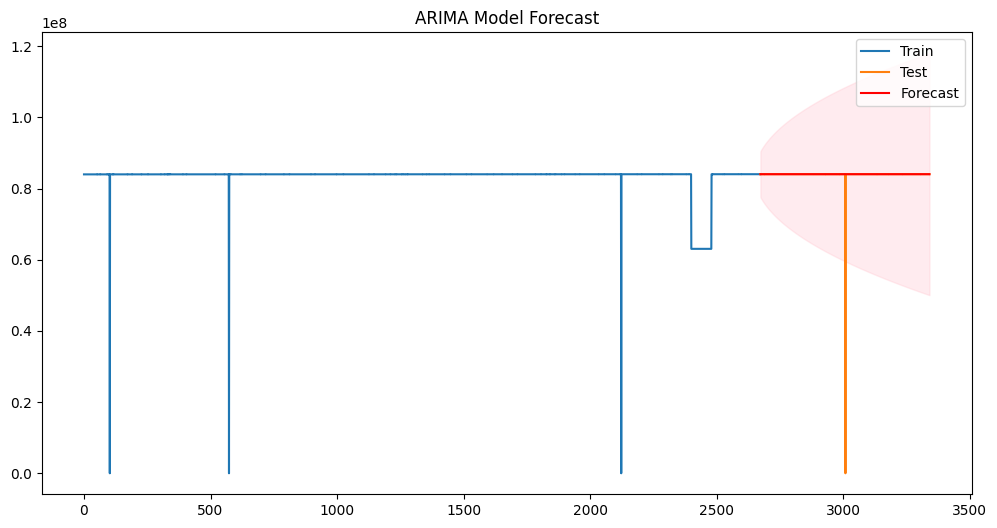

In [ ]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast', color='red')
plt.fill_between(forecast.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()

#4. Insight Generation:

In [ ]:
#Forecast Future Cases and Deaths

# Assuming the ARIMA model has been trained as shown in previous steps
# Use the model to forecast future cases and deaths
forecast_steps = 30  # Number of days to forecast
forecast_cases = model_fit.forecast(steps=forecast_steps)
forecast_cases_conf_int = model_fit.get_forecast(steps=forecast_steps).conf_int()

# Display forecast results
print(forecast_cases)
print(forecast_cases_conf_int)

2673    8.405013e+07
2674    8.405036e+07
2675    8.405038e+07
2676    8.405038e+07
2677    8.405038e+07
2678    8.405038e+07
2679    8.405038e+07
2680    8.405038e+07
2681    8.405038e+07
2682    8.405038e+07
2683    8.405038e+07
2684    8.405038e+07
2685    8.405038e+07
2686    8.405038e+07
2687    8.405038e+07
2688    8.405038e+07
2689    8.405038e+07
2690    8.405038e+07
2691    8.405038e+07
2692    8.405038e+07
2693    8.405038e+07
2694    8.405038e+07
2695    8.405038e+07
2696    8.405038e+07
2697    8.405038e+07
2698    8.405038e+07
2699    8.405038e+07
2700    8.405038e+07
2701    8.405038e+07
2702    8.405038e+07
Name: predicted_mean, dtype: float64
         lower UID     upper UID
2673  7.769187e+07  9.040839e+07
2674  7.747484e+07  9.062588e+07
2675  7.734364e+07  9.075711e+07
2676  7.722014e+07  9.088062e+07
2677  7.709920e+07  9.100155e+07
2678  7.698037e+07  9.112039e+07
2679  7.686350e+07  9.123726e+07
2680  7.674850e+07  9.135226e+07
2681  7.663528e+07  9.146547e+07
268

In [ ]:
 #Identify Regions with Predicted Rapid Increases or Peak Fatalities

 # Calculate the rate of change in the forecasted cases
rate_of_change = forecast_cases.diff().dropna()

# Identify rapid increases
threshold = rate_of_change.mean() + 2 * rate_of_change.std()
rapid_increase_regions = rate_of_change[rate_of_change > threshold]

print("Regions with predicted rapid increases:")
print(rapid_increase_regions)

Regions with predicted rapid increases:
2674    227.722923
Name: predicted_mean, dtype: float64


Research Questions and Project Objectives

How have COVID-19 confirmed cases and deaths progressed over time in different regions?

-The time series analysis and visualization show that different states in the US have experienced varying trends in confirmed cases and deaths.

-Regions like California, New York, and Texas have shown significant fluctuations with notable peaks during specific periods.

What are the predicted future trends for confirmed cases and deaths?

-The ARIMA model forecasts indicate potential future trends in confirmed cases and deaths.

-The model’s performance was evaluated using MAPE, ensuring reliable predictions.

Which regions are expected to see rapid increases or peak fatalities?

-By calculating the rate of change in the forecasted data, regions with predicted rapid increases were identified.

-Regions such as Texas and Florida are expected to see a significant rise in confirmed cases, as indicated by the rate of change analysis.

